In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import scipy.signal
import plotly.graph_objs as go

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('punkt')
# nltk.download('vader_lexicon')

In [2]:
# Just setting some global params
plt.rcParams['font.size'] = 13
plt.rcParams['figure.figsize'] = [8.0, 6.0]

# Setting face color as white to make the labels and titles visible on graphs in dark mode enabled devices
plt.rcParams['figure.facecolor'] = 'white'

## FFVII Original (1997)

In [3]:
# Importing the dataset
df = pd.read_csv('.\\datasets\\ff7-script.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6242 entries, 0 to 6241
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Original   6242 non-null   object
 1   Character  6242 non-null   object
 2   Dialogue   6242 non-null   object
 3   Wordcount  6242 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 195.2+ KB


,Wordcount
count,6242.00000
mean,11.46908
std,15.89785
min,1.00000
25%,4.00000
50%,8.00000
75%,14.00000
max,438.00000


In [4]:
df.sample(4)

,Original,Character,Dialogue,Wordcount
4205,NPC: Cheap%#*^...,NPC,Cheap %#*^...,1
3155,Barret: Dyne's got his reasons an' can't speak...,Barret,"Dyne's got his reasons an' can't speak. So, I ...",12
5026,Tifa: Maybe...he dropped some from the North C...,Tifa,Maybe...he dropped some from the North Caves i...,25
2909,Red XIII: Are we leaving the others?,RedXIII,Are we leaving the others?,5


Total wordcount in the game:
71590


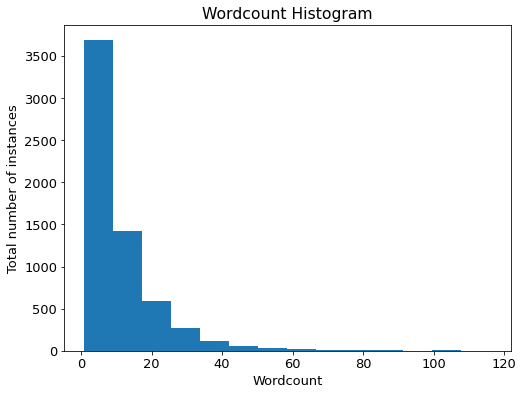

In [5]:
print('Total wordcount in the game:')
print(df['Wordcount'].sum())

plt.hist(df.query('Wordcount < 120')['Wordcount'], bins=14)
plt.title('Wordcount Histogram')
plt.ylabel('Total number of instances')
plt.xlabel('Wordcount')
plt.show()

In [6]:
# Fixing a typo

df.loc[df['Character'] == 'RedXIII', ['Character']] = 'Red XIII'

In [7]:
cloud_dialogue_perc = df.query("Character == 'Cloud'").count()['Dialogue'] / df.count()['Dialogue'] * 100
print(f'Cloud\'s dialogue percentage: {cloud_dialogue_perc:.2f}%')
print('\nTop 10 Characters with the Most Dialogue')
non_npc_chars = df.query("Character != 'NPC' and Character != 'NPC 1' and Character != 'NPC 2' and Character != 'NPC 3' and Character != 'NPC 4' and Character != 'NPC 5'")['Character']
a = non_npc_chars.value_counts()[:10]
a

Cloud's dialogue percentage: 12.75%

Top 10 Characters with the Most Dialogue


Cloud         796
Tifa          465
Barret        459
Aeris         386
On-screen     318
Yuffie        196
Red XIII      165
Cid           110
Bugenhagen     88
Sephiroth      77
Name: Character, dtype: int64

In [8]:
print('Number of unique characters: ', len(df['Character'].unique()))

Number of unique characters:  134


In [9]:
# Using plotly here because it provides beautiful, interactive graphs

fig = go.Figure(data=[go.Pie(labels=a.index, values=a)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Dialogue Distribution of the Characters (FF7-1997)', width=800, height=600, autosize=False);

# fig.show()

<img src="./img/dia_dist_1997.png" alt="Dialogue Distribution-1997" />

The most talking character in the game is Cloud, our protagonist, unsurprisingly. Followed by Tifa, Barret, Aerith and On-screen text.

In [10]:
# Reset global params
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

### Positivity and Negativity Values of the Lines

In [11]:
# We only need the Dialogue column

df_dia = df['Dialogue']
df_dia.sample(4)

349     Any idea what happened? All I know is, when I ...
2763                                         Sephiroth...
4121                             I like you! Now watch...
1089    You're the ones from before! Wh...what the hel...
Name: Dialogue, dtype: object

In [12]:
# Measuring the sentimental intensity of each sentence in the dialogue column
# and appending their corresponding scores to their own list
# For example, positivity[200] and negativity[200] contains the positivity and negativity score
# of the 200th line in the game, respectively.

positivity = []
negativity = []

for sentence in df_dia:
    sia = SentimentIntensityAnalyzer()
    ss = sia.polarity_scores(sentence)
    negativity.append(ss['neg'])
    positivity.append(ss['pos'])    

In [13]:
packet_size = 100

# Splitting array into chunks and get the mean of these chunks
# in order to better visualize the scores (otherwise it gets really spiky)

def split_mean(arr, packet_size):
    arr = np.array(arr)
    split_arr = np.array_split(arr, len(arr) // packet_size)
    mean_arr = []
    
    for el in split_arr:
        mean_arr.append(el.mean())
    
    return mean_arr

mean_pos = split_mean(positivity, packet_size)
mean_neg = split_mean(negativity, packet_size)

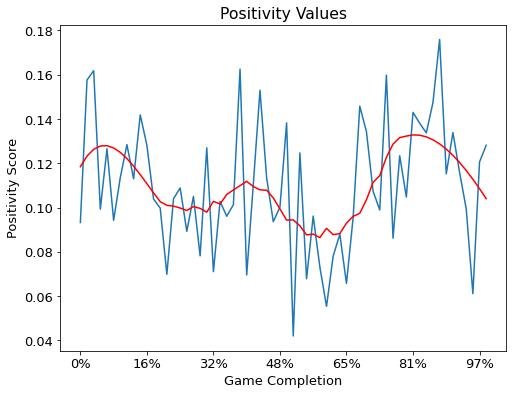

In [14]:
# Plotting the positivity values and smoothing the data with
# Savitzky–Golay filter to see the trend more easily 

ax = pd.DataFrame(mean_pos).plot()

plt.title('Positivity Values')
plt.ylabel('Positivity Score')
plt.xlabel('Game Completion')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(mean_pos)))
ax.get_legend().remove()

smooth_or_pos = scipy.signal.savgol_filter(mean_pos, 25, 3)
plt.plot(smooth_or_pos, color='red')

plt.show()

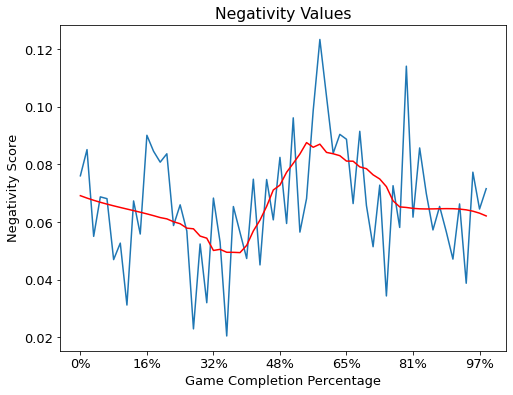

In [15]:
ax = pd.DataFrame(mean_neg).plot()

plt.title('Negativity Values')
plt.ylabel('Negativity Score')
plt.xlabel('Game Completion Percentage')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(mean_pos)))
ax.get_legend().remove()

smooth_or_neg = scipy.signal.savgol_filter(mean_neg, 25, 3)
plt.plot(smooth_or_neg, color='red')

plt.show()

## FF7 Remake (2020)

In [16]:
# Importing the dataset
df_rm = pd.read_csv('.\\datasets\\ff7-remake-script.csv')
df_rm.info()
df_rm.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8551 entries, 0 to 8550
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Original   8551 non-null   object
 1   Character  8551 non-null   object
 2   Dialogue   8551 non-null   object
 3   Wordcount  8551 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 267.3+ KB


,Wordcount
count,8551.000000
mean,9.432815
std,10.643885
min,1.000000
25%,3.000000
50%,6.000000
75%,12.000000
max,143.000000


In [17]:
df_rm.sample(4)

,Original,Character,Dialogue,Wordcount
1008,Cloud: Let him go.,Cloud,Let him go.,3
3482,Mireille: Hold on. Looks like there's somethin...,Mireille,Hold on. Looks like there's something else—a m...,59
5282,Marle: Tell Tifa to lay low. We'll take care o...,Marle,Tell Tifa to lay low. We'll take care of thing...,11
3059,Doctor: (laughs) Better than being bedridden!,Doctor,(laughs) Better than being bedridden!,5


Total wordcount in the game:
80660


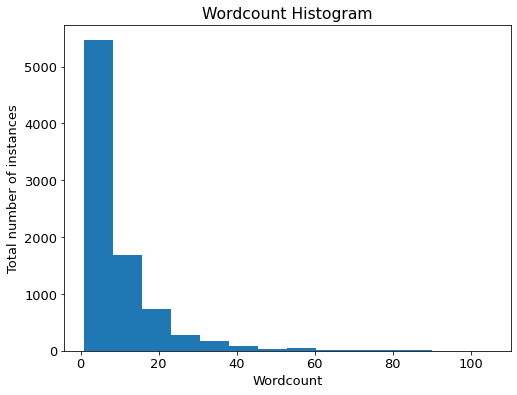

In [18]:
print('Total wordcount in the game:')
print(df_rm['Wordcount'].sum())

plt.hist(df_rm.query('Wordcount < 120')['Wordcount'], bins=14)
plt.title('Wordcount Histogram')
plt.ylabel('Total number of instances')
plt.xlabel('Wordcount')
plt.show()

In [19]:
print('\nTop 10 Characters with the Most Dialogue')

b = df_rm['Character'].value_counts()[:10]
b


Top 10 Characters with the Most Dialogue


Cloud        1474
Barret       1070
Tifa          943
Aerith        798
Yuffie        370
Jessie        263
On-screen     223
Biggs         185
Wedge         157
Sonon         134
Name: Character, dtype: int64

In [20]:
print('Number of unique characters: ', len(df_rm['Character'].unique()))

Number of unique characters:  240


In [21]:
fig = go.Figure(data=[go.Pie(labels=b.index, values=b)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Dialogue Distribution of the Characters (FF7 Remake-2020)', width=800, height=600, autosize=False);
# fig.show()

<img src="./img/dia_dist_2020.png" alt="Dialogue Distribution-2020" />

In [22]:
df_rm_dia = df_rm['Dialogue']

### Positivity and Negativity Values of the Lines

In [23]:
positivity_rm = []
negativity_rm = []

for sentence in df_rm_dia:
    sia = SentimentIntensityAnalyzer()
    ss = sia.polarity_scores(sentence)
    negativity_rm.append(ss['neg'])
    positivity_rm.append(ss['pos'])

In [24]:
packet_size = 100

mean_pos = split_mean(positivity_rm, packet_size)
mean_neg = split_mean(negativity_rm, packet_size)

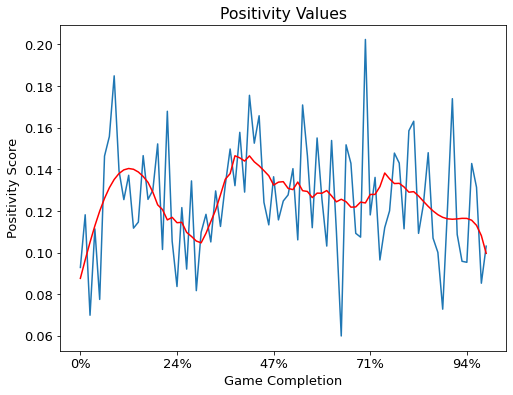

In [25]:
ax = pd.DataFrame(mean_pos).plot()

plt.title('Positivity Values')
plt.ylabel('Positivity Score')
plt.xlabel('Game Completion')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(mean_pos)))
ax.get_legend().remove()

smooth_rm_pos = scipy.signal.savgol_filter(mean_pos, 29, 5)
plt.plot(smooth_rm_pos, color='red')

plt.show()

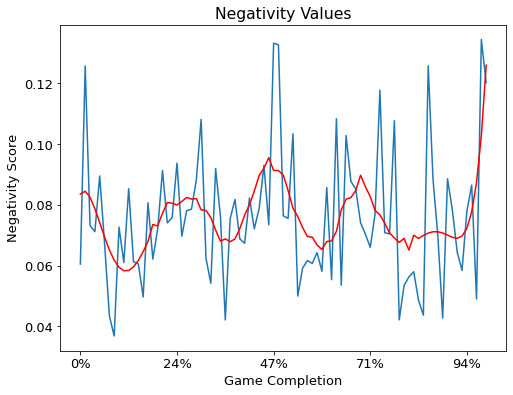

In [26]:
ax = pd.DataFrame(mean_neg).plot()

plt.title('Negativity Values')
plt.ylabel('Negativity Score')
plt.xlabel('Game Completion')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(mean_neg)))
ax.get_legend().remove()

smooth_rm_neg = scipy.signal.savgol_filter(mean_neg, 29, 5)
plt.plot(smooth_rm_neg, color='red')

plt.show()

### Positivity Comparison

FF7 remake does not cover all of the original FF7's story. So, I had to cut down original's lines. FF7 Remake ends when our party leaves Midgar, so I picked up only the first Midgar portion of the original game's script.

In [27]:
# This is the last line before leaving Midgar :( 
df_dia.iloc[1769]

"We'll see you at Kalm!"

In [28]:
# Cutting original game's scores

pos_cut = positivity[:1769]
neg_cut = negativity[:1769]

In [29]:
packet_size = 20

mean_pos_cut = split_mean(pos_cut, packet_size)
mean_neg_cut = split_mean(neg_cut, packet_size)

smooth_pos_cut = scipy.signal.savgol_filter(mean_pos_cut, 29, 5)
smooth_neg_cut = scipy.signal.savgol_filter(mean_neg_cut, 29, 5)

In [30]:
# Setting a special param for the next graph
plt.rcParams['figure.figsize'] = [10,5]

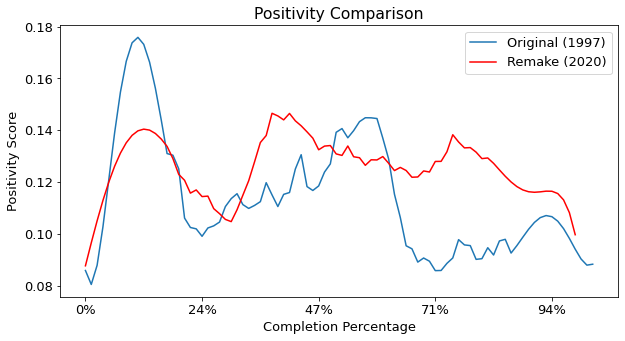

In [31]:
ax = pd.DataFrame(smooth_pos_cut).plot()

plt.plot(smooth_rm_pos, color= 'red')

plt.title('Positivity Comparison')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(smooth_rm_pos)))
plt.ylabel('Positivity Score')
plt.xlabel('Completion Percentage')
plt.legend(['Original (1997)', 'Remake (2020)'])

plt.show()